### Анализ лояльности покупателей:

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
df = pd.read_csv('/Users/79295/Desktop/GITHUB/Analytical-practice/datasets/lesson_3_data.csv',
                encoding = 'windows-1251')

In [8]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [9]:
df.shape

(48129, 21)

In [10]:
user_df = df[['tc', 'art_sp']]

In [12]:
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [13]:
user_df = user_df.rename(columns={"tc":"user_id", "art_sp":"brand_info"})

In [15]:
user_df

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [16]:
brand_name = 'MARAVILLA 500 G Store_Brand'

In [19]:
brand_name.split()[-1]

'Store_Brand'

In [25]:
def split_brand(brand_name_data):
    brand = brand_name_data.split()[-1]
    return brand

In [26]:
split_brand('MARAVILLA 500 G Store_Brand')

'Store_Brand'

In [29]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)

In [30]:
user_df

,user_id,brand_info,brand,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2,Brand_2
...,...,...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4,Brand_4,Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4,Brand_4,Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand,Store_Brand,Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand,Store_Brand,Store_Brand


In [33]:
# Более компактный способ получить имя бренда:
# Используем лямбда-функцию, чтобы разрезать строку по пробелу
# и взять последний элемент

In [31]:
user_df.brand_info.apply(lambda x: x.split()[-1])

0        Store_Brand
1        Store_Brand
2            Brand_1
3            Brand_7
4            Brand_2
            ...     
48124        Brand_4
48125        Brand_4
48126    Store_Brand
48127    Store_Brand
48128    Store_Brand
Name: brand_info, Length: 48129, dtype: object

In [44]:
# Посчитаем кол-во покупок пользователей:

In [34]:
users_purchases = user_df.groupby('user_id', as_index = False) \
                         .agg({"brand_name" : "count"})

In [35]:
users_purchases.head()

,user_id,brand_name
0,-1236394515,1
1,1031,6
2,4241,5
3,17311,2
4,17312,2


In [36]:
users_purchases = users_purchases.rename(columns={"brand_name":"purchases"})

In [37]:
users_purchases.head()

,user_id,purchases
0,-1236394515,1
1,1031,6
2,4241,5
3,17311,2
4,17312,2


In [38]:
users_purchases.purchases.median()

2.0

In [39]:
users_purchases.shape

(11764, 2)

In [40]:
users_purchases.describe()

,user_id,purchases
count,1.176400e+04,11764.000000
mean,7.690517e+07,4.091210
std,1.622210e+08,4.573143
min,-1.236395e+09,1.000000
25%,1.503761e+07,1.000000
50%,4.682179e+07,2.000000
75%,9.311601e+07,5.000000
max,1.408849e+09,60.000000


In [45]:
# Отберем для анализа только тех пользователей,
# которые совершили минимум 5 покупок:

In [42]:
users_purchases = users_purchases.query('purchases >= 5')

In [56]:
users_purchases.head(5)

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [ ]:
# Посчитаем кол-во покупок пользователей по брендам:

In [48]:
user_df.groupby(['user_id', 'brand_name'], as_index=False) \
       .agg({"brand_info":"count"})

,user_id,brand_name,brand_info
0,-1236394515,Brand_4,1
1,1031,Brand_3,1
2,1031,Store_Brand,5
3,4241,Brand_4,3
4,4241,Store_Brand,2
...,...,...,...
18183,1408817589,Store_Brand,2
18184,1408825059,Brand_1,1
18185,1408832719,Brand_4,3
18186,1408840919,Store_Brand,1


In [ ]:
# На примере одного пользователя посмотрим сколько покупок пришлось на те бренды,
# которые он выбирал:

In [49]:
user_df.groupby(['user_id', 'brand_name'], as_index=False) \
       .agg({"brand_info":"count"}) \
       .query('user_id == 1031')

,user_id,brand_name,brand_info
1,1031,Brand_3,1
2,1031,Store_Brand,5


In [54]:
# Для каждого пользователя найдем бренд,который он покупал чаще всего:

In [55]:
lovely_brand_purchases = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
       .agg({"brand_info":"count"}) \
       .sort_values(['user_id', 'brand_info'], ascending =[False, False]) \
       .groupby('user_id') \
       .head(1) \
       .rename(columns={"brand_name":"lovely_brand",
                        "brand_info": "lovely_brand_purchases"})

In [57]:
# Для каждого пользователя расчситаем сколько уникальных брендов он купил:

In [66]:
users_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({"brand_name":pd.Series.nunique}) \
    .rename(columns={"brand_name":"unique_brands"})
    

In [67]:
users_unique_brands.head()

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [73]:
# Объединим наши датафреймы в loyality_df:

In [74]:
loyality_df = users_purchases.merge(lovely_brand_purchases, on = 'user_id') \
    .merge(users_unique_brands, on = 'user_id')

In [75]:
loyality_df.head()

,user_id,purchases,lovely_brand,lovely_brand_purchases,unique_brands
0,1031,6,Store_Brand,5,2
1,4241,5,Brand_4,3,2
2,25971,7,Store_Brand,5,2
3,40911,27,Brand_4,19,5
4,45181,5,Store_Brand,2,4


In [77]:
# Найдем тех пользователеей, которые покупают 1 бренд:

In [76]:
loyal_users = loyality_df[loyality_df.unique_brands == 1]

,user_id,purchases,lovely_brand,lovely_brand_purchases,unique_brands
13,86281,14,Brand_4,14,1
18,94961,6,Brand_4,6,1
29,132061,9,Brand_4,9,1
30,134281,6,Brand_4,6,1
35,157311,12,Brand_4,12,1
...,...,...,...,...,...
3372,1010244089,9,Store_Brand,9,1
3374,1010247239,5,Brand_4,5,1
3376,1010274559,5,Brand_4,5,1
3377,1110091379,5,Brand_1,5,1


In [78]:
# Оценим лояльность:

In [79]:
loyality_df['loyality_score'] = loyality_df.lovely_brand_purchases / loyality_df.purchases

In [81]:
loyality_df.head(5)

,user_id,purchases,lovely_brand,lovely_brand_purchases,unique_brands,loyality_score
0,1031,6,Store_Brand,5,2,0.833333
1,4241,5,Brand_4,3,2,0.600000
2,25971,7,Store_Brand,5,2,0.714286
3,40911,27,Brand_4,19,5,0.703704
4,45181,5,Store_Brand,2,4,0.400000


In [93]:
# Построим график лоялити-скора

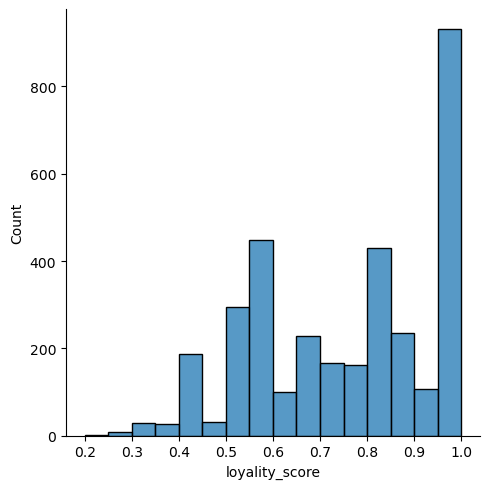

In [87]:
ax = sns.displot(loyality_df.loyality_score)

In [88]:
loyality_df.loyality_score.median()

0.8

In [91]:
brand_loyality = loyality_df.groupby('lovely_brand', as_index = False) \
    .agg({"loyality_score":"median","user_id":"count" })

In [ ]:
# Оценим лояльность покупателей по брендам

<AxesSubplot:xlabel='lovely_brand', ylabel='loyality_score'>

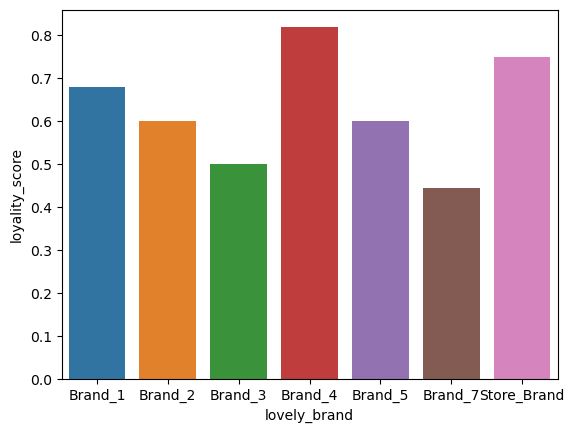

In [92]:
sns.barplot(data=brand_loyality, x="lovely_brand", y="loyality_score")